In [1]:
import pandas as pd
import datetime as dt
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sb
import numpy as np
from citipy import citipy

In [2]:
# Import csv 
fireball_df = pd.read_csv("Resources/cneos_fireball_data.csv")


In [3]:
# Observe data types
fireball_df.dtypes

Peak Brightness Date/Time (UT)          object
Latitude (deg.)                         object
Longitude (deg.)                        object
Altitude (km)                          float64
Velocity (km/s)                        float64
vx                                     float64
vy                                     float64
vz                                     float64
Total Radiated Energy (J)              float64
Calculated Total Impact Energy (kt)    float64
dtype: object

In [4]:
fireball_df.describe()

,Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
count,487.000000,284.000000,284.000000,284.000000,284.000000,9.450000e+02,945.000000
mean,36.170637,17.868310,-0.161268,-1.925704,-0.800704,7.475968e+11,1.215861
std,10.565079,5.550232,10.914556,11.037236,10.486902,1.230661e+13,14.574221
min,14.000000,9.800000,-35.400000,-43.500000,-31.200000,2.000000e+10,0.073000
25%,29.500000,14.100000,-8.500000,-9.925000,-9.200000,3.200000e+10,0.110000
50%,34.800000,16.900000,-0.750000,-2.750000,0.000000,6.200000e+10,0.200000
75%,40.700000,19.925000,8.425000,5.550000,6.925000,1.440000e+11,0.420000
max,74.000000,49.000000,27.800000,31.200000,27.000000,3.750000e+14,440.000000


In [5]:
# Convert Peak Brightness Date/Time column to datetime
fireball_df['Peak Brightness Date/Time (UT)'] = pd.to_datetime(fireball_df['Peak Brightness Date/Time (UT)'])
fireball_df

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,2023-02-02 20:49:22,26.2S,143.1W,33.0,NaN,NaN,NaN,NaN,3.000000e+10,0.100
1,2023-01-22 17:11:43,3.5N,76.2W,61.0,NaN,NaN,NaN,NaN,2.000000e+10,0.073
2,2023-01-17 06:56:59,33.1N,173.7W,38.0,14.2,7.8,-5.6,-10.5,2.900000e+10,0.100
3,2023-01-11 23:59:50,31.5N,18.6E,33.5,17.5,-16.1,4.5,-5.2,4.600000e+10,0.150
4,2023-01-09 01:17:14,45.7S,135.0E,27.0,16.7,2.3,-0.4,16.5,9.000000e+10,0.280
...,...,...,...,...,...,...,...,...,...,...
940,1993-11-29 17:48:41,26.5N,78.3E,NaN,NaN,NaN,NaN,NaN,2.600000e+10,0.092
941,1993-10-31 03:39:27,51.3N,100.9W,NaN,NaN,NaN,NaN,NaN,4.000000e+10,0.130
942,1991-10-04 09:22:47,78.7N,6.3E,NaN,NaN,NaN,NaN,NaN,5.500000e+11,1.400
943,1990-10-01 03:51:47,7.5N,142.8E,NaN,NaN,NaN,NaN,NaN,2.500000e+12,5.200


In [6]:
# Convert Peak Brightness Date/Time column to show only the year
fireball_df['Sighting Year'] = fireball_df['Peak Brightness Date/Time (UT)'].dt.year
fireball_df['Sighting Month'] = fireball_df['Peak Brightness Date/Time (UT)'].dt.month
fireball_df

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt),Sighting Year,Sighting Month
0,2023-02-02 20:49:22,26.2S,143.1W,33.0,NaN,NaN,NaN,NaN,3.000000e+10,0.100,2023,2
1,2023-01-22 17:11:43,3.5N,76.2W,61.0,NaN,NaN,NaN,NaN,2.000000e+10,0.073,2023,1
2,2023-01-17 06:56:59,33.1N,173.7W,38.0,14.2,7.8,-5.6,-10.5,2.900000e+10,0.100,2023,1
3,2023-01-11 23:59:50,31.5N,18.6E,33.5,17.5,-16.1,4.5,-5.2,4.600000e+10,0.150,2023,1
4,2023-01-09 01:17:14,45.7S,135.0E,27.0,16.7,2.3,-0.4,16.5,9.000000e+10,0.280,2023,1
...,...,...,...,...,...,...,...,...,...,...,...,...
940,1993-11-29 17:48:41,26.5N,78.3E,NaN,NaN,NaN,NaN,NaN,2.600000e+10,0.092,1993,11
941,1993-10-31 03:39:27,51.3N,100.9W,NaN,NaN,NaN,NaN,NaN,4.000000e+10,0.130,1993,10
942,1991-10-04 09:22:47,78.7N,6.3E,NaN,NaN,NaN,NaN,NaN,5.500000e+11,1.400,1991,10
943,1990-10-01 03:51:47,7.5N,142.8E,NaN,NaN,NaN,NaN,NaN,2.500000e+12,5.200,1990,10


In [ ]:
# # save to CSV
# fireball_df.to_csv("Resources/fireball_data_years.csv")

In [ ]:
# Use groupby to get a count for sightings by year
# fireball_grouped = fireball_df.sort_values('Peak Brightness Date/Time (UT)')
# fireball_grouped = fireball_grouped.groupby('Peak Brightness Date/Time (UT)', as_index=False).count()
# fireball_grouped

In [ ]:
#  fireball_grouped = fireball_grouped.rename(columns={"Latitude (deg.)": "count"})

In [ ]:
# # # Change to display just year and count
# fireball_grouped = fireball_grouped.rename(columns={"Latitude (deg.)": "count"})
# fireball_grouped = fireball_grouped[['Peak Brightness Date/Time (UT)', 'count']]
# fireball_grouped

In [ ]:
# # save to CSV
# fireball_df.to_csv("Resources/fireball_year_count.csv",index=False)

In [8]:
fireball_df["Sighting Month"] = fireball_df["Sighting Month"].replace({1 : 'January',
                                                                                    2 : 'February',
                                                                                    3 : 'March',
                                                                                    4 : 'April',
                                                                                    5 : 'May',
                                                                                    6 : 'June', 
                                                                                    7 : 'July',
                                                                                    8 : 'August',
                                                                                    9 : 'September',
                                                                                    10 : 'October',
                                                                                    11 : 'November',
                                                                                    12 : 'December'
                                                                        })


In [9]:
# How many sightings per year and per month
year_count = fireball_df["Sighting Year"].value_counts()
month_count = fireball_df["Sighting Month"].value_counts()
print(year_count, month_count)

2015    45
2005    45
2019    42
2020    41
2022    41
2018    39
2004    39
2006    37
2000    37
2003    37
2012    37
2008    37
2010    36
2009    34
2014    33
2016    33
1996    33
2021    32
2011    31
1999    30
2017    29
2002    29
2013    24
2007    23
2001    22
1997    21
1995    21
1994    13
1998    13
2023     6
1993     2
1991     1
1990     1
1988     1
Name: Sighting Year, dtype: int64 October      89
January      87
November     83
February     82
April        82
July         79
March        78
December     77
May          76
August       71
June         71
September    70
Name: Sighting Month, dtype: int64


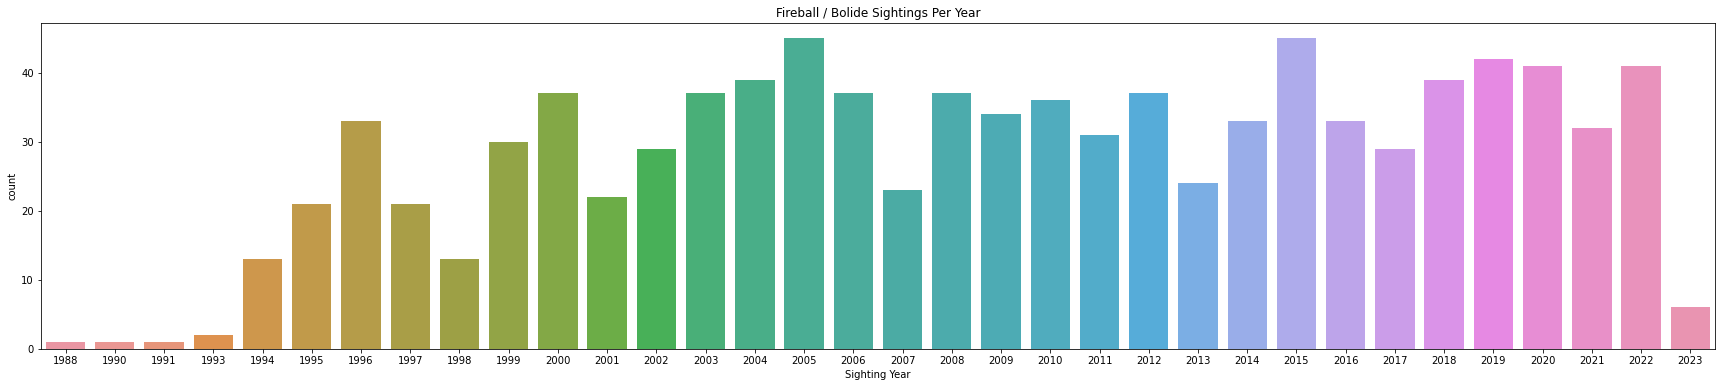

In [24]:

fig, ax = plt.subplots(figsize=(30, 6))
sb.countplot(x='Sighting Year', data=fireball_df, ax=ax).set(title="Fireball / Bolide Sightings Per Year")
plt.savefig("images/sightings_per_year.png")

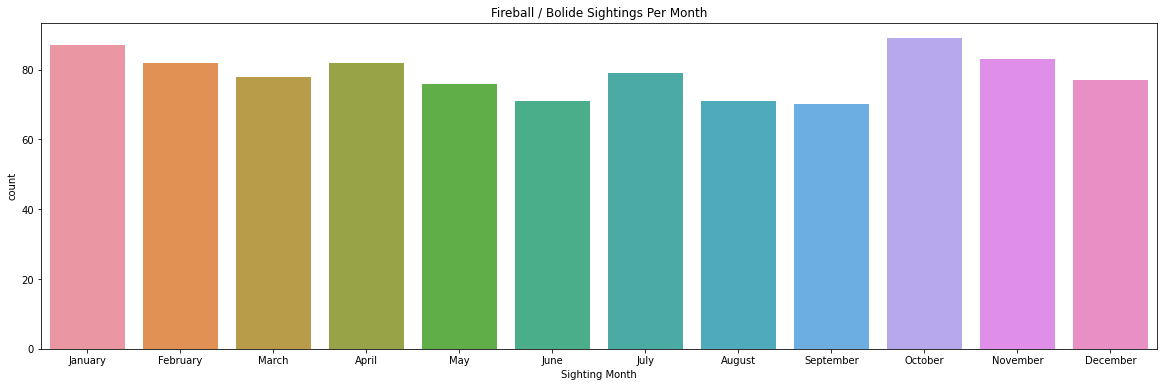

In [25]:

fig, ax = plt.subplots(figsize=(20, 6))
Months = ['January', 'February', 'March', 'April', 'May', 'June', 
             'July', 'August', 'September', 'October', 'November', 'December']
sb.countplot(x='Sighting Month', data=fireball_df, ax=ax, order=Months).set(title="Fireball / Bolide Sightings Per Month")
plt.savefig("images/sightings_per_month.png")